<a href="https://colab.research.google.com/github/tallwin/Random-Forest-Fraud-check/blob/main/Fraud_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/content/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

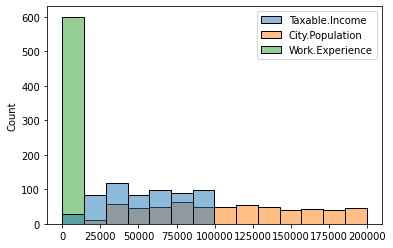

In [6]:
sns.histplot(df)

In [7]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"

df["Taxable.Income"]=df["Taxable.Income"].apply(split)

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [9]:
#Label encoding dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Urban']=le.fit_transform(df['Urban'])

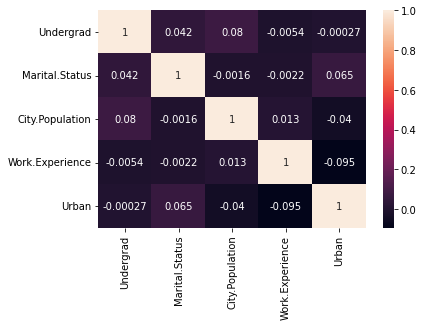

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
x=df.iloc[:,df.columns!="Taxable.Income"]
y=df['Taxable.Income']

In [14]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
#Randomforest Classifier
RF=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
RF.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [16]:
preds=RF.predict(x_test)
confusion_matrix(y_test,preds)

array([[81,  8],
       [30,  1]])

In [17]:
#Accuracy
accuracy_score(y_test,preds)

0.6833333333333333

In [18]:
pd.Series(preds).value_counts()

Good     111
Risky      9
dtype: int64

In [19]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

,actual,predicted
83,Good,Risky
146,Good,Good
156,Good,Good
80,Good,Good
404,Good,Good
...,...,...
192,Good,Good
1,Good,Good
460,Good,Good
259,Risky,Good


In [20]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.73      0.91      0.81        89
       Risky       0.11      0.03      0.05        31

    accuracy                           0.68       120
   macro avg       0.42      0.47      0.43       120
weighted avg       0.57      0.68      0.61       120

